In [1]:
import cartopy.io.img_tiles as cimgt
import glob
from celluloid import Camera
from IPython.display import HTML

# import pandas as pd
# import numpy as np
# import cartopy.crs as ccrs

# from matplotlib import pyplot as plt
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# from cmocean import cm as ccmo
# from datetime import datetime, timedelta

# import requests
# from requests.auth import HTTPBasicAuth
# import pytz
# eastern = pytz.timezone('US/Eastern')

In [2]:
import sailboat as sb # local file sailboat.py
# %load_ext autoreload ## this is to be able to edit the sailboat.py file and no need to refress
# %autoreload 2

In [62]:
# import matplotlib as mpl
# mpl.rcParams['text.color'] = 'cyan'
# mpl.rc('xtick', labelsize=20) 
# mpl.rc('ytick', labelsize=20) 

In [3]:
request = cimgt.GoogleTiles(style='satellite')

NameError: name 'cimgt' is not defined

# Test querrying the portal
## to get the url (and names for time varibales needed to parse dates): 
sb.gen_url(
    telemetry='min',
    BB3='min',
    CI='min',
    CT='min',
    O2='min',
    path=None,
    date_interval=None,
    limit=100,
)

options for groups of variables are a minimal set ('min'), all variables of the group ('all'), or none (None)


## to request the data from the portal
sb.get_data(path, date_vars=['GPSTimeStamp'])

In [40]:
url, dates = sb.gen_url()
print(url)
df = sb.get_data(url, dates)
df.dtypes

Data variables are: ['GPSTimeStamp']
http://portal.navocean.com/services/nav.php?req=data&id=VELA&columns=GPSTimeStamp%2CLon%2CLat%2CTrack%2CHeading%2CBb%28470%29+%5BNTU%5D%2CBb%28532%29+%5BNTU%5D%2CBb%28650%29+%5BNTU%5D%2CCDOM+%5BQSU%5D%2CChl.+a+%5Bppb%5D%2CPhycocyanin+%5Bppb%5D%2CConductivity+%5BmS+cm-1%5D%2CTemperature+%5Bdeg+C%5D%2CO2+Concentration+%5Bmicromolar%5D&format=csv&output=file&limit=100&token=5e5c4d86-3fd9-11eb-904e-06ad0ec96835


GPSTimeStamp                     datetime64[ns]
Lon                                     float64
Lat                                     float64
Track                                   float64
Heading                                 float64
Conductivity [mS cm-1]                  float64
Temperature [deg C]                     float64
O2 Concentration [micromolar]           float64
Bb(470) [NTU]                           float64
Bb(532) [NTU]                           float64
Bb(650) [NTU]                           float64
CDOM [QSU]                              float64
Chl. a [ppb]                            float64
Phycocyanin [ppb]                       float64
dtype: object

## Test local files

In [41]:
files = glob.glob('./Data/*.csv')
local = sb.get_data(files)
local['phyco/chla'] = local['Phycocyanin [ppb]']/local['Chl. a [ppb]']
local.dtypes

GPSTimeStamp                                 datetime64[ns]
Lon                                                 float64
Lat                                                 float64
O2 Concentration [micromolar]                       float64
O2 Saturation [%]                                   float64
Bb(470) [NTU]                                       float64
Bb(532) [NTU]                                       float64
Bb(650) [NTU]                                       float64
CDOM [QSU]                                          float64
Chl. a [ppb]                                        float64
Phycocyanin [ppb]                                   float64
local time                       datetime64[ns, US/Eastern]
phyco/chla                                          float64
dtype: object

/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


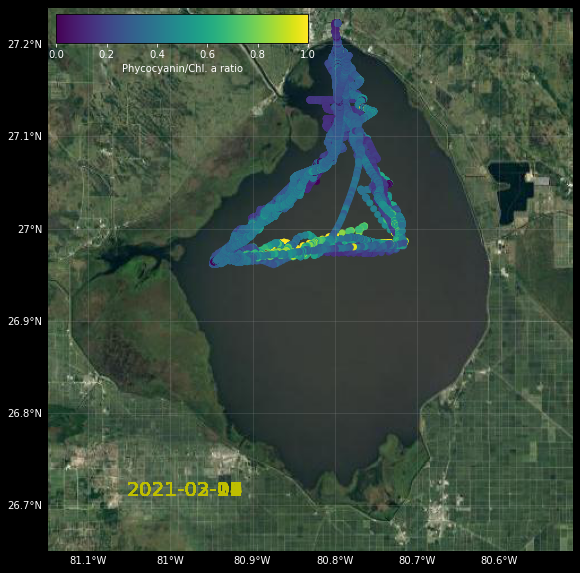

In [43]:
#subseting a month of data
subset = local[(local['local time'].dt.year == 2021)&(local['local time'].dt.month == 2)]

#background settings
## request = cimgt.GoogleTiles(style='satellite')
back_color='black'
fore_color='white'
plt.rcParams["text.color"] = fore_color
plt.rcParams["axes.labelcolor"] = fore_color
plt.rcParams["xtick.color"] =  fore_color
plt.rcParams["ytick.color"] = fore_color


fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=request.crs)
fig.patch.set_facecolor(back_color)

cax = fig.add_axes([.16, .83, .35, .04])
camera = Camera(fig)

sb.background(ax=ax, request=request)
# looping throug days
for d in range(1,31):
    day = subset[subset['local time'].dt.day == d]

    mpp = ax.scatter(day['Lon'], day['Lat'],
               c=day['Phycocyanin [ppb]']/day['Chl. a [ppb]'],
               vmin=0, vmax=1.,
               transform=ccrs.PlateCarree(),)
    
    if day.shape[0]>0:
        date = day['local time'].iloc[0]
    else:
        date += timedelta(days=1)

    ax.text(.15, .1, str(date)[:-15], fontsize=20, c='y', transform=ax.transAxes)
    fig.colorbar(mpp, cax=cax,orientation='horizontal', label='Phycocyanin/Chl. a ratio')
    camera.snap()

In [44]:
anim = camera.animate(interval=1000)
# anim.save('Jan_pcratio.mp4')
HTML(anim.to_html5_video())

/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


In [14]:
path = '/Users/hboi/OneDrive - Florida Atlantic University/HALO/navocean/Vela Sample Analysis Data and Results/'
mc = 'April Canal Point Microcystis/'
an = 'April Taylor Creek Anabaena/'

files = glob.glob(path+mc+'*.csv')
files

['/Users/hboi/OneDrive - Florida Atlantic University/HALO/navocean/Vela Sample Analysis Data and Results/April Canal Point Microcystis/Vela Sensor Data During Samples CanalPoint Apr26 2021.csv']

In [18]:
df = sb.get_data(files)
df.dtypes

GPSTimeStamp                                 datetime64[ns]
Lon                                                 float64
Lat                                                 float64
Speed                                               float64
Track                                               float64
Heading                                             float64
Pitch                                               float64
Roll                                                float64
WindTrueSpeed                                       float64
WindTrueDir                                         float64
PressureInches                                        int64
AirTemp                                             float64
BB3 [Time UTC]                                       object
Bb(470) [counts]                                      int64
Bb(532) [counts]                                      int64
Bb(650) [counts]                                      int64
CI [Time UTC]                           

In [19]:
df['phyco/chla'] = df['Phycocyanin [counts]']/df['Chl. a [counts]']

Text(0.5, 1.0, '2021-04-26 10:39:59-04:00   to   2021-04-26 11:24:55-04:00')

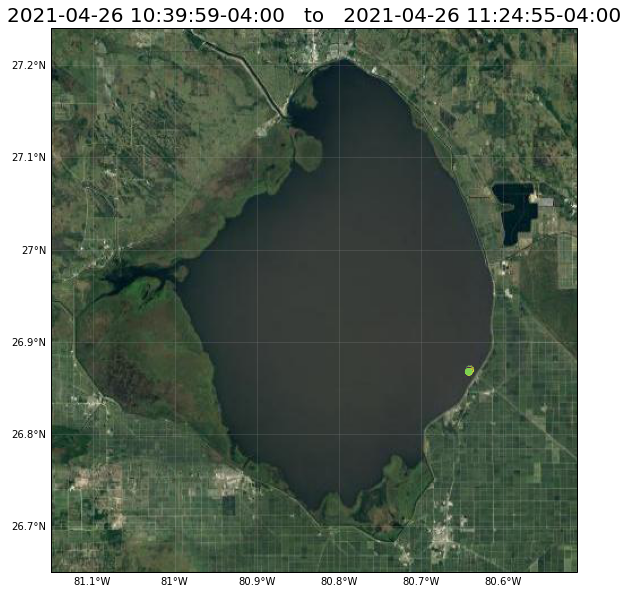

In [21]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=request.crs)
sb.background(extent = [-81.15, -80.51,26.65, 27.24], ax=ax, 
           request = request)
ax.scatter(df['Lon'], df['Lat'],
               c=df['phyco/chla'],
               vmin=0, vmax=1.,
               transform=ccrs.PlateCarree(),)
ax.set_title(str(df['local time'].iloc[-1]) + '   to   ' +str(df['local time'].iloc[0]), size= 20)

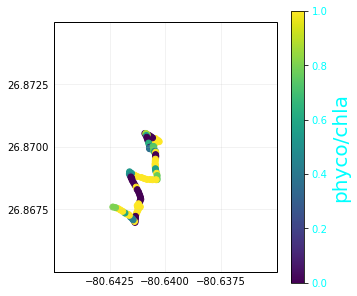

In [27]:
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=request.crs)
ax.set_extent([-80.645, -80.635,26.865, 26.875])
# background(extent = [-80.645, -80.635,26.865, 26.875], ax=ax, 
#            request = request)
mapp = ax.scatter(df['Lon'], df['Lat'],
               c=df['phyco/chla'],
               vmin=0, vmax=1.,
               transform=ccrs.PlateCarree(),)
cb = fig.colorbar(mapp,)
cb.set_label('phyco/chla', size = 20, color='cyan')
cb.ax.tick_params(labelcolor='cyan')
gl = ax.gridlines(draw_labels=True, alpha=0.2,
                  ylocs=[26.865, 26.8675, 26.87, 26.8725, 26,875],
                 xlocs=[-80.645, -80.6425, -80.64, -80.6375, -80.635, ]
                 )
# ax.set_xticks([26.8676, 26.87, 26.8725])
gl.xlabels_top = gl.ylabels_right = False

In [29]:
file2 = glob.glob(path+an+'*.csv')
df2 = sb.get_data(file2)
df2['phyco/chla'] = df2['Phycocyanin [counts]']/df2['Chl. a [counts]']

Text(0.5, 1.0, '2021-04-21 12:00:01-04:00   to   2021-04-21 13:59:48-04:00')

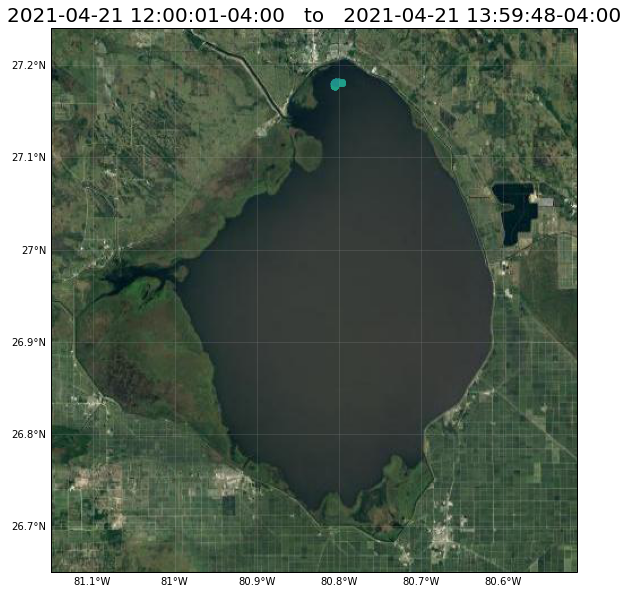

In [31]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=request.crs)
sb.background(extent = [-81.15, -80.51,26.65, 27.24], ax=ax, 
           request = request)
ax.scatter(df2['Lon'], df2['Lat'],
               c=df2['phyco/chla'],
               vmin=0, vmax=1.,
               transform=ccrs.PlateCarree(),)
ax.set_title(str(df2['local time'].iloc[-1]) + '   to   ' +str(df2['local time'].iloc[0]), size= 20)

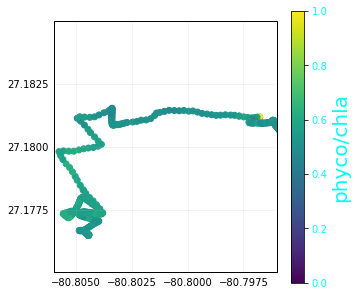

In [34]:
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=request.crs)
ax.set_extent([-80.806, -80.796, 27.175, 27.185])
mapp = ax.scatter(df2['Lon'], df2['Lat'],
               c=df2['phyco/chla'],
               vmin=0, vmax=1.,
               transform=ccrs.PlateCarree(),)
cb = fig.colorbar(mapp, label='phyco/chla')
cb.set_label('phyco/chla', size = 20, color='cyan')
cb.ax.tick_params(labelcolor='cyan')
gl = ax.gridlines(draw_labels=True, alpha=0.2,
                  ylocs=np.arange(27.175 , 27.1875, 0.0025),
                 xlocs=np.arange(-80.8075, -80.79, 0.0025),
                 )
gl.xlabels_top = gl.ylabels_right = False